In [1]:
import os
import numpy as np

import torch
import pandas as pd
import whisper
import torchaudio
from whisper.audio import (
    log_mel_spectrogram,
    pad_or_trim,
)
from tqdm import tqdm
from jiwer import wer
from data import *
from suta import *

from omegaconf import OmegaConf
args = OmegaConf.load("config.yaml")
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

In [2]:
from data import load_dataset
dataset = load_dataset(name='noisy', path='./noisy_LibriSpeech', batch_size=1)
# dataset = load_dataset(name='voicebank', path='./noisy_testset_wav', batch_size=16)

[INFO]    There are 100 samples.


In [3]:
model = whisper.load_model("tiny")

In [4]:
options = whisper.DecodingOptions(language="en", without_timestamps=True, temperature=0)

In [6]:
hypotheses = []
references = []
from whisper.normalizers import EnglishTextNormalizer

normalizer = EnglishTextNormalizer()
model = model.eval()
wer_list = []
for batch in tqdm(dataset):
    lens, wavs, texts, files = batch
    # the code is for batch size = 1
    if args.asr == 'large' or args.asr == 'large_v2' or args.asr == 'large_v3':
        mel = log_mel_spectrogram(pad_or_trim(wavs[0]), n_mels=128).unsqueeze(0).to(DEVICE)
    else:
        mel = log_mel_spectrogram(pad_or_trim(wavs[0])).unsqueeze(0).to(DEVICE)
    with torch.no_grad():
        results = model.decode(mel, options)
    # print([result.text for result in results])
    tmp_wer = wer(normalizer(texts[0]), normalizer(results[0].text))
    if tmp_wer > 0.2:
        print(tmp_wer, normalizer(texts[0]))
        print([normalizer(result.text) for result in results])

    wer_list.append(tmp_wer)

  2%|▏         | 2/100 [00:00<00:20,  4.89it/s]

0.26582278481012656 he dwelt with considerable force and energy on the almost magical hospitality he had received from the count and the magnificence of his entertainment in the grotto of the 1001 nights he recounted with circumstantial exactitude all the particulars of the supper the hashish the statues the dream and how at his awakening there remained no proof or trace of all these events save the small yacht seen in the distant horizon driving under full sail toward porto vecchio
['he dwelt with considerable force and energy on the almost magical hospitality near the sea from the count and the magnificence of his ancestors in the brothal of the 1000 and more night he recounted with circumstantial exactitude all the particulars of the suffer the hashich the statues the dream and how at his awakening there remained no proof or trace of all these events saved the small yord seen in the distant']


  5%|▌         | 5/100 [00:00<00:13,  6.88it/s]

0.24444444444444444 they bent eagerly over the board each watching with feverish anxiety his companion is movements each casting now and again a gloating eye upon the heap of gold and greenbacks that lay between them and at times half stretching out his hand to clutch it
['they have been legally over the board each watching with feverish anxiety whose companions movements each casting now and again a gloating eye upon the keep of gold and greenbacks that lay between them and at times past stretching out his hand watching']
0.2413793103448276 i am here much more out of people is way than in town where my aunt and such as pretend an interest in me and a power over me do so persecute me with their good nature and take it so ill that they are not accepted as i would live in a hollow tree to avoid them
['i am here much more out of people is way than in town than i am answering such as pretending interest in me and the power of me do so persepire me like they are good nature i will take it s

  7%|▋         | 7/100 [00:01<00:13,  6.92it/s]

0.25 this time also as before she borrowed a brush and brushed her hair with it and the gold dropped down as she did it and again she sent the dog out 3 times and when day dawned she departed but as she was going she said as she had said before i shall come once more and then never again
['this time also as before she borrowed a bus and bus to haelford and the gold dropped down as she did it and again she sent the doll out 3 times and when they do not she departed but as she was going she said as she had said before and so come on it is more and then never again']


  9%|▉         | 9/100 [00:01<00:13,  6.51it/s]

0.20454545454545456 sancho got up with pain enough in his bones and went after the innkeeper in the dark and meeting the officer who was looking to see what had become of his enemy he said to him senor whoever you are do us the favor and kindness to give us a little rosemary oil salt and wine for it is wanted to cure one of the best knights errant on earth who lies on yonder bed wounded by the hands of the enchanted moor that is in this inn
['sontra got up with painted off in this boat and went after the incubator in the dark and meeting the officer who was looking to see what had become of his enemy he said to him sin yor whoever you are do us the favorite of kinas to give us a little rosemary oil salt and wine for it is water to cure one of our best nights aired on earth who lies on your bed wounded by the hands of the enchanted war that is in this it']


 11%|█         | 11/100 [00:01<00:14,  6.34it/s]

0.36363636363636365 and yet the reader who likes a complete image who desires to read with the senses as well as with the reason is entreated not to forget that he prolonged his consonants and swallowed his vowels that he was guilty of elisions and interpolations which were equally unexpected and that his discourse was pervaded by something sultry and vast something almost african in its rich basking tone something that suggested the teeming expanse of the cotton field
['and yet the reader who likes a complete image who desires to read with the senses as well as with the reason is entry to not to forget that he has been allowing his consonants and swallowing his vowels that he was guilty of the legions and the impersonations which were equally unexpected and that his discourse was perverted by something soldering and vast something all must have written in its rich vast intake']
0.35294117647058826 talking of countries replied franz of what country is the count what is his native tongu

 14%|█▍        | 14/100 [00:02<00:11,  7.18it/s]

0.3684210526315789 helvin fickle and wife of greenton valley were attending the springs at that time and either of them will testify to the above for john and i sat in front of mister smith while he was preaching and was in his company for a few moments together with his wife and mister and missus fickle after service
['helden fickle in life of greened and valley for attending the springs of that time an either of them will testify to be a blow for john and i said in front of mister smith as well he was preaching and was in his company for a few moments together this is why then mister smith fickle after the service']


 16%|█▌        | 16/100 [00:02<00:11,  7.24it/s]

0.21875 if we are laying out a garden planning one before the house you know and there you have a tree that is stood for centuries in the very spot old and gnarled it may be and yet you do not cut down the old fellow to make room for the flowerbeds but lay out your beds so as to take advantage of the tree
['if we are laying out a garden planning one before the house you know and they have a tree that is still a century in the very spot old and mailed of my view and yet you look up down the old fellow to make room for the flower beds but lay out your beds so as to take advantage of the tree']


 20%|██        | 20/100 [00:02<00:09,  8.31it/s]

0.21153846153846154 he heard the magician going up the spiral staircase to his room above and after changing himself to a mouse to slip under the door and see that the room was really empty chris resumed his proper shape and opened the doors of the cupboard at the far end of the room
['here the magician going up the spiral staircase to his room above and after changing himself to a mouse to split under the door and see that the room was really empty mister jones is proper shape and open the doors of the cupboard far into the room']


 22%|██▏       | 22/100 [00:03<00:12,  6.21it/s]

0.2857142857142857 this he set in a saucer wetted with a little water and after waiting a short time smelt and tasted it and then he took out of the chest a booklet wherein he read awhile and said weeping know 0 ye passengers that in this book is a marvelous matter denoting that whoso cometh hither shall surely die without hope of escape for that this ocean is called the sea of the clime of the king wherein is the sepulcher of our lord solomon son of david on both be peace
['this he said in a source that wetted with a little water and after waiting a short time smelled and tasted it and then he took out of the chest a booklet wherein he read a while and said weeping no 0 e passengers that in this book is a marvelous matter denoting that who so come to this shall surely die without hope of escape for the dissociation is called the sea of the climb of the king wherein is a sepulcro of our lord is son']
0.20833333333333334 franz who seemed attracted by some invisible influence towards the

 28%|██▊       | 28/100 [00:04<00:09,  7.22it/s]

0.22 he laughed but it was a curious kind of laugh full of vexation injured amour propre as the french call our love of our own dignity of which archibald raystoke in the full flush of his young belief in his importance as a british officer had a pretty good stock
['he laughed but it was a curious kind of laugh full of exacent injured amoreu proper as the french call our love of our own dignity at which archibald ray stroke in the full flesh of his young belief in his important and sad abradesh officer had a pretty good stock']


 30%|███       | 30/100 [00:04<00:09,  7.78it/s]

0.72 the pacific crayfish however serves every purpose and while many contend that its meat is not so delicate in flavor as that of its eastern cousin the californian will as strenuously insist that it is better but of course something must always be allowed for the patriotism of the californian
['the pacific waves the shore of the surface and while many contaminants meet not to tell the flavor as an issue comes in the california wall is strengthening the existence of the spread but of course something is always being allowed to be featured in the california wall']
0.574468085106383 shall we make a positive appointment for a particular day and hour inquired the count only let me warn you that i am proverbial for my punctilious exactitude in keeping my engagements day for day hour for hour said albert that will suit me to a dot
['showing me the positive appointments for a particular day in our inquiry at the current only let me warn you that i am prepared for my spontaneous exactity to 

 32%|███▏      | 32/100 [00:04<00:09,  7.43it/s]

0.3442622950819672 she was perfectly safe after writing to basil ransom and indeed it was difficult to see what he could have done to her except thank her he was only exceptionally superlative for her letter and assure her that he would come and see her the 1st time his business he was beginning to get a little should take him to boston
['she was perfectly safe after arriving today as a ransom and indeed it was difficult to see what he could adopt to her it is a fine path he was only exceptionally superlative for her left hand and a sure her that he would come and see her the 1st time his business was beginning to get to the church she would take him to boston']
0.40425531914893614 bright and natty were the chintz curtains and the little toilet set out not inelegantly and her pet piping goldfinch asleep on his perch with his bit of sugar between the wires of his cage her pillow so white and unpressed with its little edging of lace
['right and that with its jeans curtains and the little

 41%|████      | 41/100 [00:05<00:07,  7.58it/s]

0.3090909090909091 know 0 chief wazir that here where you have encountered me allah hath given you rest from fatigue and bringeth you your desire after the easiest of fashions for that his almighty will restoreth to you zau al makan and his sister nuzhat al zaman whereby we will settle the matter as we easily can
['no 0 chief was here that here where you have encountered me allah have given you rest from fatigue and bring us you your desire after the easiest of passions for that he is almighty will restore it to you zawamakan and his sister nusat azaman whereby we will settle the matter as we easily can']
0.22 it was here that most magnificent dinners were arranged it was here that extraordinary dishes were concocted by chefs of world wide fame it was here that lobster a la newberg reached its highest perfection and this is the recipe that was followed when it was prepared in the delmonico
['it was here that most magnificent dinners were arranged it was here that extraordinary dishes w

 45%|████▌     | 45/100 [00:06<00:06,  8.91it/s]

0.6666666666666666 every year she solemnly renewed her vows and at the moment of taking the oath she said to the priest monseigneur saint francois gave it to monseigneur saint julien monseigneur saint julien gave it to monseigneur saint eusebius monseigneur saint eusebius gave it to monseigneur saint procopius et cetera et cetera
['every year she saw me renewed her house and at the moment of taking the oath she said to the priest']


 47%|████▋     | 47/100 [00:06<00:06,  8.20it/s]

0.3389830508474576 he slackened his pace and tapped sharply at the little window of that modest post office at which the young ladies in the pony carriage had pulled up the day before and within which luke waggot was wont to sleep in a sort of wooden box that folded up and appeared to be a chest of drawers all day
['this lack in the space and tap sharpling a bloody window of the marvelous post office at which the young lady in the pony carriage had pulled up the day before and within which lyra krabbit was launched asleep in a sort of wooden box that folded up an appear to be a chest of drawers all day']


 49%|████▉     | 49/100 [00:06<00:06,  7.35it/s]

0.3469387755102041 gurr turned away impatiently again and signing to his men to follow they all began to tramp up the steep track leading toward the hoze with the rabbits scuttling away among the furze and showing their white cottony tails for a moment as they darted down into their holes
['goura turned away impatiently again and sounding to his mind to follow they all began to trample up the steve track moving toward the hose with the rabbit scuttling away i am on the 1st and showing their way to connie tales for a moment as they darted down into their homes']


 51%|█████     | 51/100 [00:07<00:06,  7.06it/s]

0.46551724137931033 the grandame whom he supplied with fagots the merchant whom he rescued from robbers the king is councilor to whom he gave aid all became his friends up and down the land to beggar or lord homeless wanderer or high born dame he gladly gave unselfish service all unsought and such as he helped straightway became his friends
['the grand daying whom he supplied with that gets the merchant whom he rescued from all the berts the kim is counselor to whom he gave aid all became his friends up the down the land beggar or lured home with one word or a high born day he gladly gave himself a service all its own and such as he helps straight away becaus in his friends']


 54%|█████▍    | 54/100 [00:07<00:06,  7.32it/s]

0.3111111111111111 her voice was low and agreeable a cultivated voice and she extended a slender white hand to her visitor who remarked with some solemnity he felt a certain guilt of participation in missus luna is indiscretion that he was intensely happy to make her acquaintance
['her voice was low and agreeable accoled to those of voice and she extended a slender wide hand to her visitor for remarked with some solemnity it felt a certain view of the participation in missus loonism discussion but he would intensely happy to make her acquaintance']
0.5 his heart contracted painfully and his solicitude about his uncle is fate increased when philippus informed him that the conspirators had been arrested at the banquet and headed by amyntas the rhodian chrysippus and proclus had perished by the executioner is sword at sunrise
['his heart contracted painfully it is the institute of bihal is uncle is fading craze to fulfill a personal form to the conspirators had been arrested at the banque

 57%|█████▋    | 57/100 [00:08<00:06,  6.86it/s]

0.4528301886792453 the new game of begging and inventing stories to interest the people from whom it was worth while to beg went on gaily day by day and week by week and dickie by constant practice grew so clever at taking his part in the acting that mister beale was quite dazed with admiration
['when you game of begging and inventing stories to interest the people from the moment was worse large back we are donating they were day and week by week and thinking that comes and factors we will so clever at taking this part in the action that mister b was quite days with admiration']


 59%|█████▉    | 59/100 [00:08<00:05,  7.01it/s]

0.31666666666666665 the rhodian was just beginning to praise arsinoe also as a special friend and connoisseur of the sculptor is art when crates hermon is fellow student asked the blind artist in behalf of his beautiful companion why his demeter was placed upon a pedestal which to others as well as himself seemed too high for the size of the statue
['the rodion was just beginning to produce arsenal also as a special friend and economists europe is sculptures are to win crates hermons fellow student asked the blind artist and be had with his beautiful companion why his diameter was placed upon a pedestal witch to others as well as himself seem too high for the size of the statue']


 62%|██████▏   | 62/100 [00:08<00:04,  7.70it/s]

0.3023255813953488 every one who is turbulent has been found by king merneptah the testimony of the oldest biblical narratives regarding the sojourn of the hebrews in egypt is also in perfect accord with the picture which the contemporary egyptian inscriptions give of the period
['everyone whose trouble has been found by king marnet pat the testimony of the oldest biblical narrative regarding the sojourn of the hebrews in egypt is also in perfect accord with the picture which it can temporary egyptian descriptions give the period']


 65%|██████▌   | 65/100 [00:09<00:04,  7.65it/s]

0.2857142857142857 the search usually produced a large and varied yield this is funny said peter pigeoncote to his wife some half hour after their conversation here is a telegram from wilfrid saying he is passing through here in his motor and would like to stop and pay us his respects
['the search usually produced a large and varied view this is funny said either pigeon votes wife some have our after deconversation here is a telegram from the 3rd saying he is passing through here in his motor and would like to stop in p s his respects']


 68%|██████▊   | 68/100 [00:09<00:04,  6.93it/s]

0.24242424242424243 his order has produced 40 popes 200 cardinals 50 patriarchs 1600 archbishops 4600 bishops 4 emperors 12 empresses 46 kings 41 queens 3600 canonized saints and has been in existence for 1400 years
['his order has produced 40 pokes 200 cardinals 50 patriarchs 1600 archbishop is 4600 bishops 4 emphors 12 emphorses 46 king 41 queenies 3600 canonized saint and has been in existence for 1400 years']


 71%|███████   | 71/100 [00:10<00:04,  6.95it/s]

0.41818181818181815 the matter is not great for i confess i do naturally hate the noise and talk of the world and should be best pleased never to be known i not upon any occasion whatsoever yet since it can never be wholly avoided one must satisfy oneself by doing nothing that one need care who knows
['it might say it is not great but i can best actually hate the noise and talk of the world and should be the best keys never to be known in a one in eat occasion whatsoever yet since it can never be holding a word of one must satisfy oneself by doing nothing that one you care you know']


 73%|███████▎  | 73/100 [00:10<00:03,  7.07it/s]

0.29411764705882354 blamed if he did not inquire about everybody and everything in that blessed town and all about the wilkses and about peter is businesswhich was a tanner and about george swhich was a carpenter and about harvey swhich was a dissentering minister and so on and so on then he says
['plamed to feed in the choir about everybody and everything in that blessed town and all about the wilkes and about peter is business which was a tenor and about georgia which was a carpenter and about harvey is which was a desentering minister and so on and so on then he says']
0.29508196721311475 never mind what the business was it suffices to say that it was a good beginning for a young man like tom who having been born and bred in the most conservative class of the most conceited city in new england needed just the healthy hearty social influences of the west to widen his views and make a man of him
['never mind what the business boss it is selfish as to say that it was a good beginning f

 77%|███████▋  | 77/100 [00:11<00:04,  5.44it/s]

0.2857142857142857 i am willing to enter into competition with the ancients and feel able to surpass them for since those early days in which i made the medals of pope clement i have learned so much that i can now produce far better pieces of the kind i think i can also outdo the coins i struck for duke alessandro which are still held in high esteem in like manner i could make for you large pieces of gold and silver plate as i did so often for that noble monarch king francis of france thanks to the great conveniences he allowed me without ever losing time for the execution of colossal statues or other works of the sculptors craft
['i am willing to enter into competition with the asians and feel able to surpass them for some sense early days in which i made the medals of pope clement i have learned so much that i can now produce far better pieces of the kind i think i can also outdo the coins i struck for duke alexander which is still held in high esteem in lake manor i could make the n

 79%|███████▉  | 79/100 [00:11<00:03,  5.81it/s]

0.20634920634920634 mister fish is the squire of dames and has so many mistresses that anybody may pretend a share in him and be believed but though i have the honor to be his near neighbor to speak freely i cannot brag much that he makes any court to me and i know no young woman in the country that he does not visit often
['it is the fish is a square of things it has so many mistresses that everybody may pretend to share in him and be believed though i have the honor to be his near neighbor to speak really i cannot brag much that he may make any court to me and i know no young woman in the country that he does not visit often']
0.2923076923076923 0 those bars he mentally exclaimed and he was advancing toward them when just as he drew near there was a rustling noise under the window a couple of hands seized the bars there was a scratching of boot toes against stone work and ram is face appeared to gaze into the room by intention but into the astonished countenance of the young midshipm

 82%|████████▏ | 82/100 [00:11<00:02,  6.23it/s]

0.21311475409836064 so be it then replied the count and extending his hand towards a calendar suspended near the chimney piece he said to day is the 21st of february and drawing out his watch added it is exactly half past 100 clock now promise me to remember this and expect me the 21st of may at the same hour in the forenoon
['so be it then reply at the count and extending his hand towards the calendar suspended near the chimpanzees he said today is the 21st of february and drawing out his watch at it it is exactly half past 100 clock now promised me to enunder this and expect me the 21st of may of the same hour in the fornoons']
0.23076923076923078 this butter is made as follows place the shells on a baking sheet in the oven to dry let the shells cool and then pound them in a mortar with a little lobster coral and 4 ounces of fresh butter thoroughly bruising the whole together so as to make a fine paste
['this butter is made as follows place the shells in a baking sheet in the oven to

 85%|████████▌ | 85/100 [00:12<00:02,  6.53it/s]

0.2857142857142857 well in earnest if i were a prince that lady should be my mistress but i can give no rule to any one else and perhaps those that are in no danger of losing their hearts to her may be infinitely taken with one i should not value at all for so says the justinian wise providence has ordained it that by their different humors everybody might find something to please themselves withal without envying their neighbors
['well in earnest if i were prince that lady should be my mistress but i can give no rule to anyone else and perhaps those that are a no danger of losing your hearts to her can be infinitely taken as life i should not value her so says it just to me while his providence has ordained it that by their different feelings everybody might find something to please themselves rather without ordained any']


 87%|████████▋ | 87/100 [00:12<00:01,  7.02it/s]

0.4423076923076923 we will do thee no upright 0 my son nor wrong thee in aught but our object is that thou bend thy gracious steps with me to my mistress to receive her answer and return in weal and safety and thou shalt have a handsome present as one who bringeth good news
['we will do the noah pride on my son not wrongly in our and our object is the tao band is digression steps with me to my misfers to receive her answer and return in real and safety and tao shall have a hand some present as one to bring us good news']


 90%|█████████ | 90/100 [00:13<00:01,  6.62it/s]

0.296875 a wilfrid pigeoncote had covered himself with honors in the course of marlborough is campaigns and the name wilfrid had been a baptismal weakness in the family ever since the new heir to the family dignity and estates was a young man of about 5 and 20 who was known more by reputation than by person to a wide circle of cousins and kinsfolk
['a well freded pigeon goat had covered himself with honors in the course of marlboro is campaign and the name lillford had been about this small weakness in the family ever since then you air to the family the githy and estates was a young man of about 5 and 20 who was known more by reputation than by person to provide circle of cousins and kids full']


 92%|█████████▏| 92/100 [00:13<00:01,  7.00it/s]

0.44680851063829785 luke stuck on his greasy wideawake and in a few minutes more the dog cart was trundled out into the lane and the horse harnessed went between the shafts with that wonderful cheerfulness with which they bear to be called up under startling circumstances at unseasonable hours
['luke stuck home in greasy wide awake and in a few minutes more the dark heart was trampled out into the lane and the horse connect went between the shops with that wonderful churphines which were placed there to be called up on the stop link circumstance with an unseasonable hours']
0.2413793103448276 now as polly was by no means a perfect creature i am free to confess that the old temptation assailed her more than once that week for when the 1st excitement of the dodging reform had subsided she missed the pleasant little interviews that used to put a certain flavor of romance into her dull hard working days
['now as polywas by no means a perfect creature i am free to confess that the old tempt

 94%|█████████▍| 94/100 [00:13<00:00,  6.12it/s]

0.32098765432098764 in speaking of confectionary it should be remarked that all the various preparations above named come strictly speaking under that head for the various fruits flowers herbs roots and juices which when boiled with sugar were formerly employed in pharmacy as well as for sweetmeats were called confections from the latin word conficere to make up but the term confectionary embraces a very large class indeed of sweet food many kinds of which should not be attempted in the ordinary cuisine
['in speaking of infectionary it should be remarked that all the various preferences about many times typically speaking under that head for various fruit flowers herbs and uses which one wore with sugar were formally employed in pharmacy as well as for sweetened fruits were called confections from the latin word come to us there to make that but the term infectionary embraces a very large cross dede of a sweet food many times of which should not be attended in the ordinary cuisine']
0.

 96%|█████████▌| 96/100 [00:14<00:00,  6.17it/s]

0.2125 it was so tender earnest and defiant that fanny forgot the defense of her own lover in admiration of polly is loyalty to hers for this faithful all absorbing love was a new revelation to fanny who was used to hearing her friends boast of 2 or 3 lovers a year and calculate their respective values with almost as much coolness as the young men discussed the fortunes of the girls they wished for but could not afford to marry
['it was her tender earnest and defiant that plenty forgot the defense of her own love and admiration of police authority to her for this faithful all absorbing love was a new revelation to plenty who was used to hearing your finest bowst of 2 or 3 lovers a year and calculate their respective values with almost as much corners of the young man discussed fortunes of the girls they wished for but good not afford to marry']


 98%|█████████▊| 98/100 [00:14<00:00,  6.57it/s]

0.3125 the former was full of trouble and anguish not accusing him but deeply regretting his connection with his profligate companions abusing mister grimsby and others insinuating bitter things against mister huntingdon and most ingeniously throwing the blame of her husband is misconduct on to other men is shoulders
['the fool who was full of trouble and anguish not accusing him but keep the regretting his connection with his profligate companions abusing mister grimm is being others he is sitting waiting bitter things against mister houndton and most in generously throwing the blame of her husband is misconduct on the other men is shoulders']


100%|██████████| 100/100 [00:14<00:00,  6.10it/s]

0.21428571428571427 and amongst them were some who would have chosen the cadet zau al makan for quoth they his name be light of the place and he hath a sister nuzhat al zaman highs the delight of the time but they set out 5 years ago for al hijaz and none wotteth what is become of them
['and amongst them were some who would have chosen the kada zawa makan for what they his name the light of place and he had a sister nusat al zaman pais the delight of the time but they set out 5 years ago for alkijas and none watered what is become of them']


100%|██████████| 100/100 [00:14<00:00,  6.79it/s]


In [6]:
np.array(wer_list).mean()

1.068640334103679

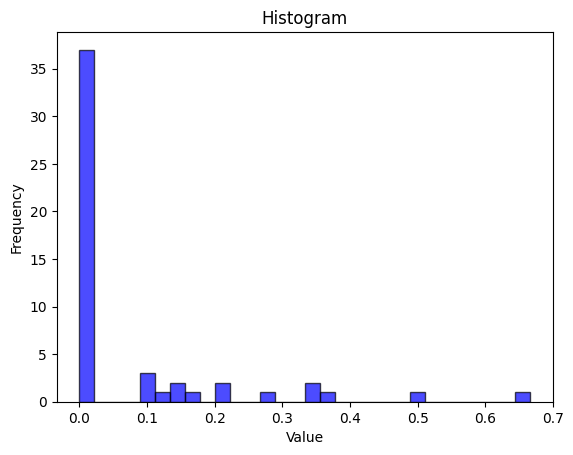

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# 绘制直方图
plt.hist(wer_list, bins=30, density=False, alpha=0.7, color='blue', edgecolor='black')
plt.title('Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')

# 绘制密度估计图
# werr_list = np.array(a)
# density, bins, _ = plt.hist(werr_list, bins=30, density=True, alpha=0)
# plt.plot(bins, 1/(np.sqrt(2*np.pi)*np.std(werr_list)) * np.exp(-0.5*(bins-np.mean(werr_list))**2/np.var(werr_list)), color='red')
# plt.title('WER distribution')
# plt.xlabel('WER')
# plt.ylabel('Density')

plt.show()
